# Análisis de Tendencias Climáticas Globales (1850–2024)

Este proyecto tiene como objetivo analizar la evolución de la temperatura global desde 1850 utilizando datos del proyecto Berkeley Earth. 

## 1. Introducción
Como sabemos, a lo largo de los años la temperatura en la superficie de la Tierra ha ido cambiando debido a factores humanos. Proyectos como [Berkeley Earth](https://berkeleyearth.org/) tienen la misión de concientizar a la población acerca de las consecuencias del calentamiento global. Es por ello que recaban información de la temperatura global en escalas de días, meses y años. En este proyecto, utilizaré datos históricos de temperatura promedio global entre los años 1850 y 2024, con resolución mínima de un mes, con el fin de estudiar la evolución de la temperatura global y buscar posibles tendencias a lo largo de los años. 
 
### Descripción de los datos 
De acuerdo con la página de Berkeley Earth, el conjunto de datos consta de lo siguiente: 

1. **Mediciones de temperatura del aire sobre la superficie terrestre.** Estos datos provienen de estaciones meteorológicas distribuidas por todo el mundo. Para esta medición se consideraron alrededor de 21 millones de datos mensuales de 50660 series temporales. 
2. **Mediciones de temperatura de la superficie marina.** Estos datos son recabados por Boyas en la superficie del océano, Barcos (usados principalmente en el pasado), Satélites, aunque en este caso no se incluyen las mediciones. Estos datos estan compuestos por 483,003,641 observaciones de temperatura instantáneas de la temperatura del agua.
3. Para representar las regiones cubiertas por hielo marino, se realizaron extrapolaciones de temperatura a partir de áreas cercanas: desde la temperatura del aire en zonas terrestres adyacentes y desde la temperatura del agua en áreas de mar abierto próximas al hielo. Aunque es posible medir la temperatura del agua bajo el hielo marino, esta no se utiliza, ya que se considera que la temperatura del aire sobre el hielo ofrece una representación más natural de la temperatura de la superficie terrestre.   
4. La temperatura se reporta por año y por mes en intervalos mensuales, anuales, a 10 años y a 20 años y comprenden desde Enero de 1850 hasta Diciembre de 2024. Además, las mediciones incluyen una incertidumbre que corresponde a un intervalo de confianza del 95%.  
5. Las unidades de medida son grados Celsius y las temperaturas se presentan como anomalías con respecto a la temperatura promedio calculada tomando en cuenta un intervalo de 30 años, comprendido entre Enero de 1951 y Diciembre de 1980.
6. Considerando que la masa terrestre de la Tierra no está distribuida simétricamente respecto al Ecuador, existe una estacionalidad promedio en la temperatura global. Esto quiere decir que la temperatura global promedio es más alta en ciertos meses del año debido a cómo la tierra se calienta y enfría más rápidamente que el agua. Por lo tanto, la anomalía de temperatura que se reporta en este archivo es con respecto al promedio global entre enero de 1951 y diciembre de 1980, para cada mes del año. Las temperaturas promedio globales están dadas por la siguiente tabla.

<center>

|      Mes      |  Ene  | Feb |  Mar |  Abr  |  May |  Jun |  Jul |  Ago  |  Sep |  Oct |  Nov |  Dic  |
|:-------------:|:-----:| :----: | :----: |:-----:| :----: | :----: | :----: |:-----:| :----: | :----: | :----: |:-----:|
|  Temperatura  | 12.23 | 12.44 | 13.06 | 13.97 | 14.95 | 15.67 | 15.95 | 15.79 | 15.19 | 14.26 | 13.24 | 12.49 | 
| Incertidumbre | 0.03  | 0.02 | 0.02 | 0.03  | 0.03 | 0.03 | 0.03 | 0.02  | 0.02 | 0.02 | 0.03 | 0.03  |  

</center>

En la primera parte de este proyecto analizaremos los datos de temperatura para la superficie terrestre. Dejaremos el análisis de las temperaturas de las masas de agua para la segunda parte.



## 2. Carga y exploración de los datos

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
root_dir = '../' #este sería el directorio raíz 
# Cargar archivo CSV
df = pd.read_csv(root_dir+'data/climate_change_data.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               2100 non-null   int64  
 1   Month              2100 non-null   int64  
 2   monthly_Anomaly    2100 non-null   float64
 3   monthly_Unc.       2100 non-null   float64
 4   annual_Anomaly     2089 non-null   float64
 5   annual_Unc.        2089 non-null   float64
 6   five_yr_Anomaly    2041 non-null   float64
 7   five_year_Unc.     2041 non-null   float64
 8   ten_yr_Anomaly     1981 non-null   float64
 9   ten_yr_Unc.        1981 non-null   float64
 10  twenty_yr_Anomaly  1861 non-null   float64
 11  twenty_yr_Unc.     1861 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 197.0 KB


,Year,Month,monthly_Anomaly,monthly_Unc.,annual_Anomaly,annual_Unc.,five_yr_Anomaly,five_year_Unc.,ten_yr_Anomaly,ten_yr_Unc.,twenty_yr_Anomaly,twenty_yr_Unc.
count,2100.000000,2100.000000,2100.000000,2100.000000,2089.000000,2089.000000,2041.000000,2041.000000,1981.000000,1981.000000,1861.000000,1861.000000
mean,1937.000000,6.500000,0.008250,0.122963,0.006026,0.076079,-0.003031,0.060447,-0.013205,0.055177,-0.030026,0.050110
std,50.529356,3.452875,0.432058,0.081854,0.409378,0.045792,0.382501,0.033482,0.361992,0.027495,0.326868,0.022455
min,1850.000000,1.000000,-1.004000,0.030000,-0.598000,0.025000,-0.471000,0.021000,-0.442000,0.019000,-0.375000,0.017000
25%,1893.000000,3.750000,-0.295000,0.049000,-0.296000,0.031000,-0.302000,0.025000,-0.307000,0.023000,-0.307000,0.021000
50%,1937.000000,6.500000,-0.085500,0.116000,-0.108000,0.078000,-0.090000,0.064000,-0.071000,0.060000,-0.062000,0.061000
75%,1981.000000,9.250000,0.219250,0.164000,0.204000,0.090000,0.214000,0.074000,0.147000,0.070000,0.096000,0.066000
max,2024.000000,12.000000,1.548000,0.570000,1.354000,0.300000,1.084000,0.184000,1.027000,0.130000,0.864000,0.103000


In [45]:
df.head()

,Year,Month,monthly_Anomaly,monthly_Unc.,annual_Anomaly,annual_Unc.,five_yr_Anomaly,five_year_Unc.,ten_yr_Anomaly,ten_yr_Unc.,twenty_yr_Anomaly,twenty_yr_Unc.
0,1850,1,-0.753,0.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.202,0.416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.367,0.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.596,0.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.619,0.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como podemos ver, las primeras filas en las anomalías de temperatura anual, a 1, 5, 10 y a 20 años se muestran como NaNs. Esto es así porque la temperatura promedio en cada periodo de tiempo se da a mitad del intervalo. Es decir, la temperatura promedio del año 1850 se da en Junio de 1850, la temperatura promedio a 5 años (1850, 1851, 1852, 1853, 1854) se da a la mitad del intervalo, en Junio de 1852. Lo mismo para el intervalo de 10 años (1850-1859) que se da en Noviembre de 1854 y para 20 años (1850-1879) cuya temperatura promedio se da en Noviembre de 1859. Para este proyecto utilizaremos solamente los cambios anuales, por lo que nos quedaremos con la columnas 'Year', 'Month', 'annual_Anomaly' y 'annual_Unc.'   

## 3. Limpieza de datos


In [51]:
# Seleccionamos las columnas con las cuales trabajaremos
df_new = df[['Year', 'Month', 'annual_Anomaly', 'annual_Unc.']]
# Eliminamos los nulos (NaN)
df_new = df_new.dropna()
df_new

,Year,Month,annual_Anomaly,annual_Unc.
5,1850,6,-0.436,0.170
6,1850,7,-0.386,0.176
7,1850,8,-0.403,0.166
8,1850,9,-0.418,0.172
9,1850,10,-0.421,0.187
...,...,...,...,...
2089,2024,2,1.354,0.032
2090,2024,3,1.331,0.031
2091,2024,4,1.329,0.031
2092,2024,5,1.322,0.032


## 4. Análisis exploratorio (EDA)
Vamos a graficar la temperatura promedio anual desde 1850 hasta 2024. Como ya lo dijimos, este dato se encuentra en Junio de cada año. Seleccionemos este mes de nuestro dataframe. y preparamos un gráfico para analizar la tendencia en temperatura. 

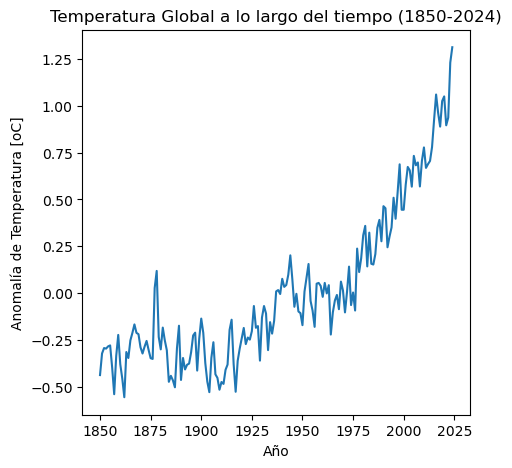

In [161]:
#Seleccionando el mes de Junio 
df_annual = df_new[df_new['Month'] == 6]
#Preparamos un entorno gráfico
fig1, ax1 = plt.subplots(1,1, figsize=(5,5))
# Gráfico básico de temperatura
ax1.set_title('Temperatura Global a lo largo del tiempo (1850-2024)')
ax1.plot(df_annual['Year'], df_annual['annual_Anomaly'], label='Anomalía de Temperatura')
ax1.set_xlabel('Año')
ax1.set_ylabel('Anomalía de Temperatura [oC]')
plt.show()

Como podemos observar, aunque existen variaciones en temparatura a lo largo de los años, existe una tendencia de aumento en la temperatura global. Utilizando una media móvil podemos descartar variaciones pequeñas y obtener una tendencia más definida. 

## 5. Análisis de tendencias


C:\Users\darkp\AppData\Local\Temp\ipykernel_23020\4083772183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual['Rolling_Mean'] = df_annual['annual_Anomaly'].rolling(10).mean()


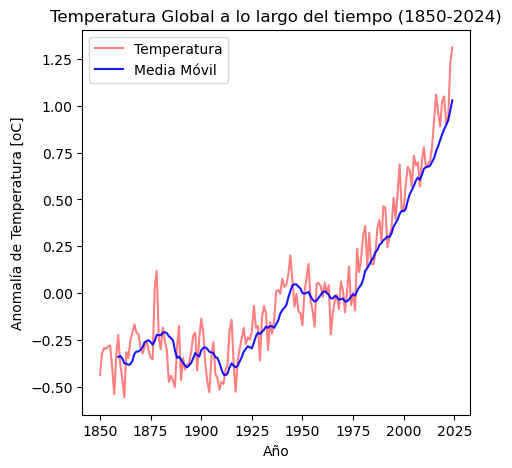

In [166]:
# Creamos una media móvil a 10 años para descartar fluctuaciones anuales menores
df_annual['Rolling_Mean'] = df_annual['annual_Anomaly'].rolling(10).mean()
# Graficamos nuestros datos originales contra la media móvil 
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.set_title('Temperatura Global a lo largo del tiempo (1850-2024)')
ax2.set_ylabel('Anomalía de Temperatura [oC]')
ax2.set_xlabel('Año')
ax2.plot(df_annual['Year'], df_annual['annual_Anomaly'], color='red', label='Temperatura', alpha=0.5)
ax2.plot(df_annual['Year'], df_annual['Rolling_Mean'], color='blue', label='Media Móvil', alpha=0.9)
ax2.legend()
plt.show()

La media móvil nos permite identificar la tendencia subyacente de las anomalías térmicas anuales. Al considerar una ventana de 10 años, estamos eliminando las variaciones con periodos menores de tiempo. Esta media móvil revela incrementos y decrementos de temperatura en el periodo de 1850 a 1975, momento a partir del cual se observa un aumento continuo y sostenido, el cual refuerza la evidencia de un calentamiento global progresivo. 
 Estimaremos ahora de manera más exacta qué tanto ha aumentado la temperatura desde 1850 a la fecha mediante una regresión lineal aplicada a nuestros datos anuales de temperatura. 

C:\Users\darkp\AppData\Local\Temp\ipykernel_23020\2851984870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual['Prediccion']= model.predict(year)


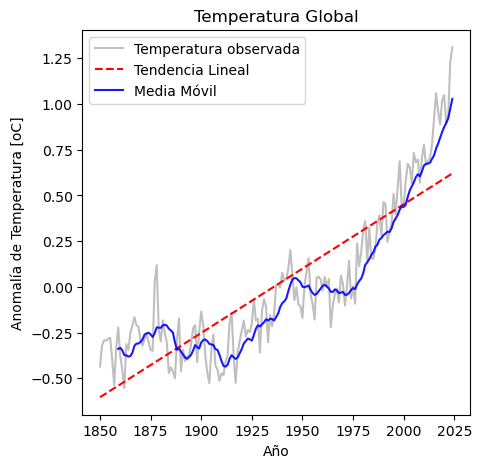

La temperatura global ha aumentado un promedio de 0.0070 grados Celsius por año


In [167]:
from sklearn.linear_model import LinearRegression
year = df_annual['Year'].values.reshape(-1,1)
temp = df_annual['annual_Anomaly'].values
#Creamos y ajustamos el modelo 
model=LinearRegression()
model.fit(year,temp)
#guardamos las predicciones en nuestro dataframe anual
df_annual['Prediccion']= model.predict(year)
#Graficamos los resultados de nuestra regresión contra los datos originales
fig3, ax3 = plt.subplots(1,1, figsize=(5,5))
ax3.set_title('Temperatura Global')
ax3.plot(year,temp,label='Temperatura observada', color='gray', alpha=0.5)
ax3.plot(year, df_annual['Prediccion'], color='red', label='Tendencia Lineal', ls='--')
ax3.plot(df_annual['Year'], df_annual['Rolling_Mean'], color='blue', label='Media Móvil', alpha=0.9)
ax3.set_xlabel('Año')
ax3.set_ylabel('Anomalía de Temperatura [oC]')
ax3.legend()
plt.show()
print('La temperatura global ha aumentado un promedio de {:.4f} grados Celsius por año'.format(model.coef_[0]))

Esto quiere decir que en 174 años la temperatura global de la superficie terrestre aumentó 1.22 grados. Este cálculo respalda una tendencia sostenida de calentamiento global. Es importante hacer notar que esta regresión lineal se realizó en todo el intervalo de tiempo (1850-2024) suponiendo que el aumento de temperatura no se vió acelerado, algo que no es del todo correcto si observamos el cambio de pendiente en los datos a partir de 1980. Una manera de correcta para estimar el aumento de temperatura sería considerar de 1850 a 1980 y de 1980 a 2024 y posteriormente realizar un promedio. El resultado obtenido en este proyecto no se aleja mucho del valor reportado por Berkeley Earth, el cual es de 1.3 grados Celsius.  

## 6. Detección de anomalías
De manera general hemos analizado la evolución de la temperatura global desde 1850 hasta la fecha. Sin embargo, no podemos dar por concluido este análisis sin antes haber estudiado las diversas anomalías térmicas que han existido a lo largo de los años (los fenómenos del Niño y de la Niña, por ejemplo).  Una forma de detectar estas anomalías es mediante la búsqueda de puntos fuera del promedio +- 2 desviaciones estándar. A este procedimiento se le conoce como el Z-score. 

0.8384324597339273 -0.821883888305356       Year  Month  annual_Anomaly  annual_Unc.  Prediccion  Rolling_Mean
1985  2015      6           0.923        0.027    0.557108        0.7194
1997  2016      6           1.059        0.027    0.564144        0.7571
2009  2017      6           0.962        0.026    0.571181        0.7836
2021  2018      6           0.888        0.028    0.578217        0.8155
2033  2019      6           1.024        0.031    0.585253        0.8473
2045  2020      6           1.049        0.032    0.592289        0.8745
2057  2021      6           0.895        0.030    0.599326        0.8972
2069  2022      6           0.936        0.031    0.606362        0.9220
2081  2023      6           1.229        0.031    0.613398        0.9744
2093  2024      6           1.311        0.032    0.620435        1.0276


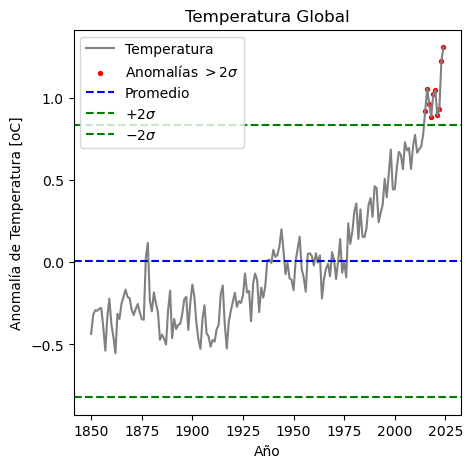

In [168]:
#Comenzamos calculando el promedio y la desviación estándar de nuestro dataframe anual
annual_mean = df_annual['annual_Anomaly'].mean()
annual_std = df_annual['annual_Anomaly'].std()
# Identificación de puntos fuera de media +/- 2*std
upper = annual_mean + 2*annual_std
lower = annual_mean - 2*annual_std
# Filtramos las anomalías 
anomalies = df_annual[(df_annual['annual_Anomaly']>upper) | (df_annual['annual_Anomaly']<lower)]
print(upper, lower, anomalies)
# Graficamos las anomalías 
fig4, ax4 = plt.subplots(1,1, figsize=(5,5))
ax4.set_title('Temperatura Global')
ax4.plot(df_annual['Year'], df_annual['annual_Anomaly'], color='gray', label='Temperatura')
ax4.scatter(anomalies['Year'], anomalies['annual_Anomaly'], color='red', label=r'Anomalías $> 2 \sigma$',s=8)
ax4.axhline(annual_mean, color='blue', linestyle='--', label='Promedio')
ax4.axhline(upper, color='green', linestyle='--', label=r'$+2 \sigma$')
ax4.axhline(lower, color='green', linestyle='--', label=r'$-2 \sigma$')
ax4.set_xlabel('Año')
ax4.set_ylabel('Anomalía de Temperatura [oC]')
ax4.legend()

Hemos identificado anomalías con respecto al promedio global histórico, destacando eventos extremos que podrían asociarse con eventos como el Niño o la Niña o con eventos volcánicos. Estos años deben interpretarse como una variabilidad natural pero también demuestran cómo el calentamiento global puede amplificar eventos climáticos que de por sí ya son extremos. 

## 7. Visualización de resultados
### Anomalías anuales + Media Movil + línea de tendencia

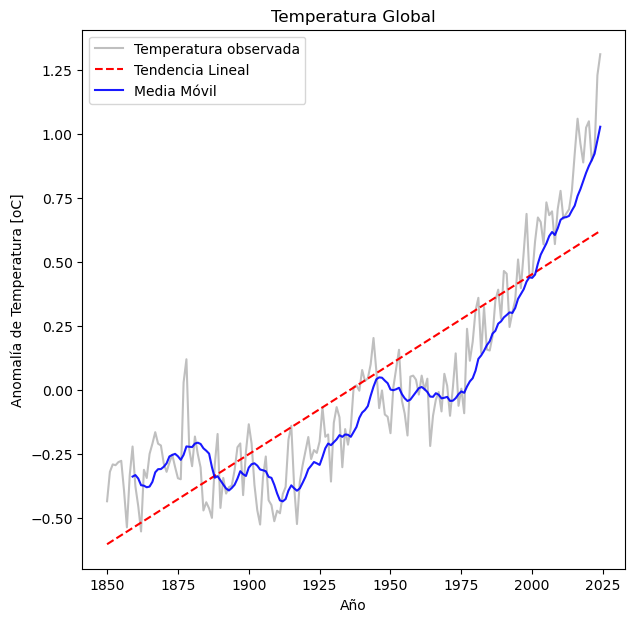

In [182]:
#Graficamos los resultados de nuestra regresión contra los datos originales
fig3, ax3 = plt.subplots(1,1, figsize=(7,7))
ax3.set_title('Temperatura Global')
ax3.plot(year,temp,label='Temperatura observada', color='gray', alpha=0.5)
ax3.plot(year, df_annual['Prediccion'], color='red', label='Tendencia Lineal', ls='--')
ax3.plot(df_annual['Year'], df_annual['Rolling_Mean'], color='blue', label='Media Móvil', alpha=0.9)
ax3.set_xlabel('Año')
ax3.set_ylabel('Anomalía de Temperatura [oC]')
ax3.legend()
fig3.savefig(root_dir+'output/'+'anomalies_mean_linear.png', bbox_inches='tight')
plt.show()

### Detección de anomalías 

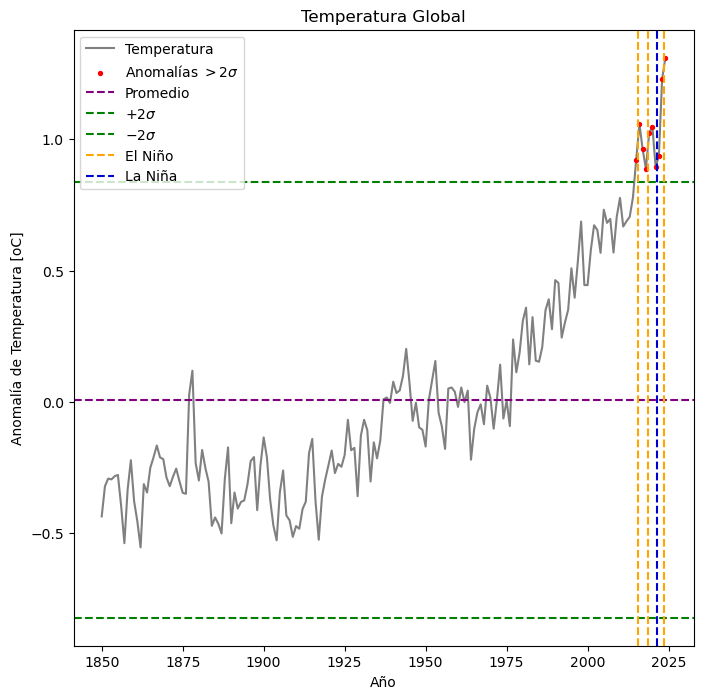

In [181]:
# Graficamos las anomalías 
fig4, ax4 = plt.subplots(1,1, figsize=(8,8))
ax4.set_title('Temperatura Global')
ax4.plot(df_annual['Year'], df_annual['annual_Anomaly'], color='gray', label='Temperatura')
ax4.scatter(anomalies['Year'], anomalies['annual_Anomaly'], color='red', label=r'Anomalías $> 2 \sigma$',s=8, zorder=10)
ax4.axhline(annual_mean, color='purple', linestyle='--', label='Promedio')
ax4.axhline(upper, color='green', linestyle='--', label=r'$+2 \sigma$')
ax4.axhline(lower, color='green', linestyle='--', label=r'$-2 \sigma$')
ax4.axvline(2015.5, color='orange', linestyle='--', label='El Niño',zorder=10)
ax4.axvline(2018.5, color='orange', linestyle='--',zorder=10)
ax4.axvline(2023.5, color='orange', linestyle='--',zorder=10)
ax4.axvline(2021.5, color='mediumblue', linestyle='--', label='La Niña',zorder=10)
ax4.set_xlabel('Año')
ax4.set_ylabel('Anomalía de Temperatura [oC]')
ax4.legend()
fig4.savefig(root_dir+'output/'+'anomaly_detection.png', bbox_inches='tight')
plt.show()

### Top de los 10 años más calurosos de la historia

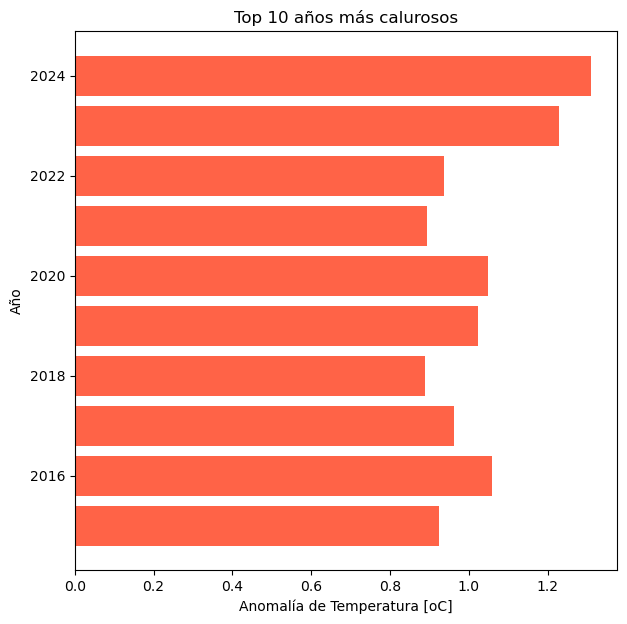

In [180]:
top_hottest = df_annual.sort_values(by='annual_Anomaly', ascending=False).head(10)
fig5, ax5 = plt.subplots(1,1, figsize=(7,7))
ax5.barh(top_hottest['Year'], top_hottest['annual_Anomaly'], color='tomato')
ax5.set_ylabel('Año')
ax5.set_xlabel('Anomalía de Temperatura [oC]')
ax5.set_title('Top 10 años más calurosos')
fig5.savefig(root_dir+'output/'+'top_ten_hottest.png', bbox_inches='tight')
plt.show()

### Distribución de anomalías térmicas 

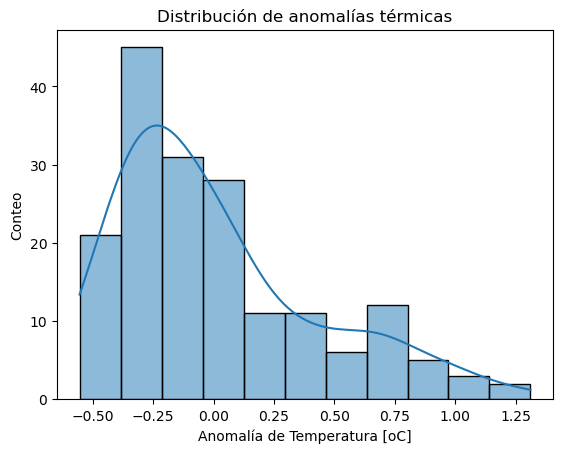

In [179]:
import seaborn as sns
sns.histplot(df_annual['annual_Anomaly'], kde=True)
plt.title('Distribución de anomalías térmicas')
plt.xlabel('Anomalía de Temperatura [oC]')
plt.ylabel('Conteo')
plt.savefig(root_dir+'output/'+'thermal_anomalies_dist.png', bbox_inches='tight')

### Heatmap por cada década del año

C:\Users\darkp\AppData\Local\Temp\ipykernel_23020\2538840740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual['Decade'] = (df_annual['Year'] // 10) * 10


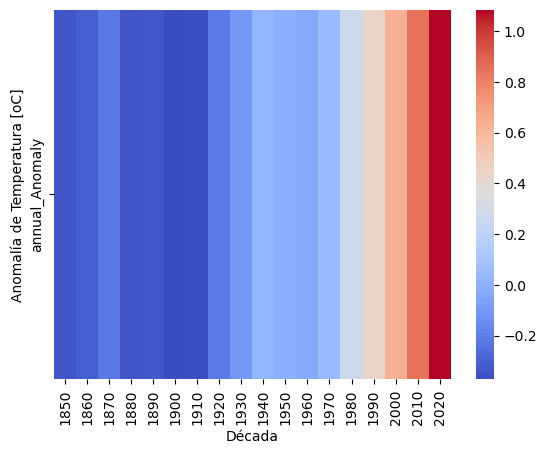

In [178]:
df_annual['Decade'] = (df_annual['Year'] // 10) * 10
df_annual['Decade'].rename('Decada')
pivot = df_annual.pivot_table(index='Decade', values='annual_Anomaly', aggfunc='mean')
sns.heatmap(pivot.T, cmap='coolwarm', annot=False)
plt.ylabel('Anomalía de Temperatura [oC]')
plt.xlabel('Década')
plt.savefig(root_dir+'output/'+'heatmap_decades.png', bbox_inches='tight')


In [175]:
top_hottest

,Year,Month,annual_Anomaly,annual_Unc.,Prediccion,Rolling_Mean
2093,2024,6,1.311,0.032,0.620435,1.0276
2081,2023,6,1.229,0.031,0.613398,0.9744
1997,2016,6,1.059,0.027,0.564144,0.7571
2045,2020,6,1.049,0.032,0.592289,0.8745
2033,2019,6,1.024,0.031,0.585253,0.8473
2009,2017,6,0.962,0.026,0.571181,0.7836
2069,2022,6,0.936,0.031,0.606362,0.9220
1985,2015,6,0.923,0.027,0.557108,0.7194
2057,2021,6,0.895,0.030,0.599326,0.8972
2021,2018,6,0.888,0.028,0.578217,0.8155


## 8. Conclusiones
En esta proyecto hemos analizado la evolución de la temperatura global desde 1850 hasta 2024 tomando únicamente las mediciones del aire sobre la superficie terrestre de la Tierra, notando las siguientes tendencias: 
1. La temperatura global ha ido en aumento a un promedio de 0.007 grados Celsius por año, teniendo un incremento más marcado en los últimos ~40 años, donde se ha visto que el calentamiento se acelera con respecto a los años anteriores. Tomando esto en cuenta, se estima que la temperatura aumentó 1.2 grados celsius en estos 174 años. 
2. Las desviaciones de +- 2$\sigma$ con respecto a la temperatura promedio más marcadas ocurrieron en los años 2014 en adelante y se corresponden con fenómenos estacionales conocidos con El Niño y La Niña. Sin embargo, es importante notar que, debido al calentamiento global, estos fenómenos se han visto incrementados. 
3. El top 10 de temperaturas más altas con respecto al promedio global se alcanzó en años recientes y es muy probable que la temperatura récord siga en aumento con el paso de los años. 
4. Como consecuencia de este calentamiento global podremos presenciar, en este y en los próximos años, un aumento de incendios forestales que darán lugar a la pérdida de grandes héctareas de bosque, como ocurrió con los incendios en California, acaecidos en Febrero de 2025. 
5. Con la pérdida de los llamados púlmones de la Tierra, que además ayudan a regular la temperatura, es posible que se acelere aún más el calentamiento global. 
6. Es importante hacer notar que la especie humana es la causante de todo este calentamiento ya que, con la evolución de la tecnología el uso de los recursos de la Tierra y la generación de más residuos también se ve incrementada.    

## 9. Recursos y referencias
- Fuente de datos: https://berkeleyearth.org/data/
- https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111
- Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
    Record, Earth Syst. Sci. Data, 12, 3469�3479, 
    https://doi.org/10.5194/essd-12-3469-2020, 2020.